In [1]:
# Importing the necessary libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import urllib.parse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Remote Database server details
host = '18.136.157.135'
username = 'dm_team2'
password = 'DM!$Team&27@9!20!'
user_pass = urllib.parse.quote(password)
db_name = 'project_sales'

In [3]:
# Connection string to connect to remote database using sqlalchemy
conn = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+host+'/'+db_name)
conn.table_names()

['data']

In [4]:
# Write the data into a df from the remote server using select query
query = 'select * from data'
df = pd.read_sql(query,conn)

In [5]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [6]:
df.shape

(7422, 9)

In [7]:
df.describe

<bound method NDFrame.describe of                Created Product_ID            Source      Mobile  \
0     14-11-2018 10:05                      Website  984XXXXXXX   
1     14-11-2018 09:22                      Website     XXXXXXX   
2     14-11-2018 09:21                      Website     XXXXXXX   
3     14-11-2018 08:46                      Website     XXXXXXX   
4     14-11-2018 07:34                      Website     XXXXXXX   
...                ...        ...               ...         ...   
7417  28-04-2018 09:45          9              Call               
7418  28-04-2018 09:43         15              Call               
7419  28-04-2018 09:20          5  Live Chat-Direct               
7420  28-04-2018 08:04         21          CRM form               
7421  28-04-2018 07:54         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1          

In [8]:
# The columns Mobile, Email and Created is removed as it is not relevent to the Sale prediction
df.drop(['Mobile'], axis = 1, inplace=True)
df.drop(['EMAIL'], axis = 1, inplace=True)
df.drop(['Created'], axis = 1, inplace=True)

In [9]:
# Replacing null values with nan values
df.replace('',np.nan,inplace=True)

In [10]:
# Checking for null values
df.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [11]:
# Droping null values
df.dropna(inplace=True)

In [12]:
# Checking for null values again
df.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [13]:
# Checking for duplicate values
df.duplicated().sum()

2565

In [14]:
# Droping duplicate values
df = df.drop_duplicates()

In [15]:
# Checking for duplicate values
df.duplicated().sum()

0

In [16]:
# Checking the shape of the data after removing null values and duplicate values
df.shape

(4763, 6)

#### Status

In [17]:
print("Number of Unique values initially:", df.Status.nunique())

Number of Unique values initially: 11


In [18]:
# Viewing all the unique values of Status
df.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [19]:
# Defining 'Status' as 'High_Potential' or 'Low_Potential'
df.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High_Potential',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low_Potential',inplace=True)

In [20]:
print("Number of Unique values final:", df.Status.nunique())

Number of Unique values final: 2


In [21]:
df.Status.unique()

array(['High_Potential', 'Low_Potential'], dtype=object)

<AxesSubplot:title={'center':'Lead Quality'}>

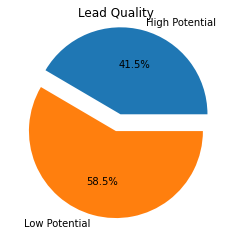

In [22]:
df.groupby('Status').size().plot(kind='pie', labels=['High Potential','Low Potential'], title = 'Lead Quality', explode = [0.2,0],autopct='%1.1f%%', ylabel = "")

#### From the pie chart, 58.5% of the leads are having Low Potential

### Product_ID

In [23]:
print("Number of Unique values:", df.Product_ID.nunique())

Number of Unique values: 29


In [24]:
df.Product_ID.unique()

array(['9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '24', '26', '16', '23', '22', '8', '14',
       '6', '17', '0', '28', '7', '4'], dtype=object)

<AxesSubplot:xlabel='Product_ID'>

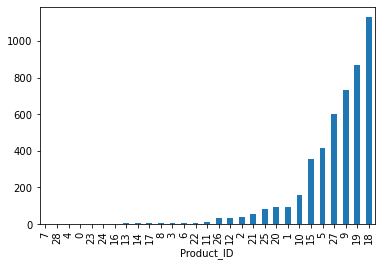

In [25]:
df.groupby('Product_ID')['Status'].count().sort_values(ascending=True).plot.bar() 

#### Product ID 18, 19, 9, 27, 5, 15 are the most sold products

### Source

In [26]:
print("Number of Unique values:", df.Source.nunique())

Number of Unique values: 25


In [27]:
df.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

<AxesSubplot:xlabel='Source'>

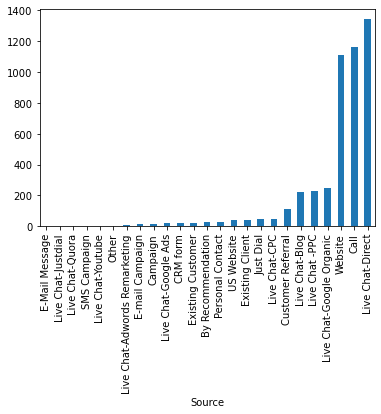

In [28]:
df.groupby('Source')['Status'].count().sort_values(ascending=True).plot.bar() 

#### Live Chat-Direct, Call, Website are the mostly used source

### Sales Agent

In [29]:
print("Number of Unique values:", df.Sales_Agent.nunique())

Number of Unique values: 11


In [30]:
df.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

<AxesSubplot:xlabel='Sales_Agent'>

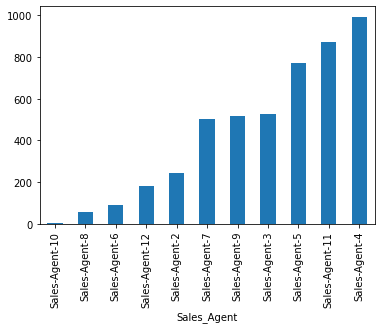

In [31]:
df.groupby('Sales_Agent')['Status'].count().sort_values(ascending=True).plot.bar() 

#### Sales Agent 4, 11 and 5 are the top 3 most agents involed with more sales activites

### Location

In [32]:
print("Number of Unique values:", df.Location.nunique())

Number of Unique values: 17


In [33]:
df.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

<AxesSubplot:xlabel='Location'>

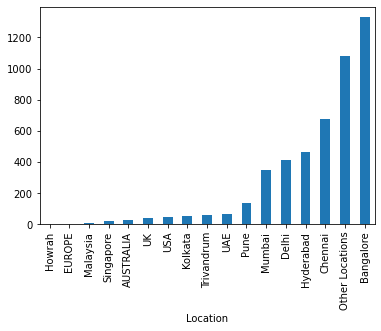

In [34]:
df.groupby('Location')['Status'].count().sort_values(ascending=True).plot.bar() 

#### Banglore is the top Location that involved in more sales activities followed by Chennai

### Delivery Mode

In [35]:
print("Number of Unique values:", df.Delivery_Mode.nunique())

Number of Unique values: 5


In [36]:
df.Delivery_Mode.unique()

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

<AxesSubplot:xlabel='Delivery_Mode'>

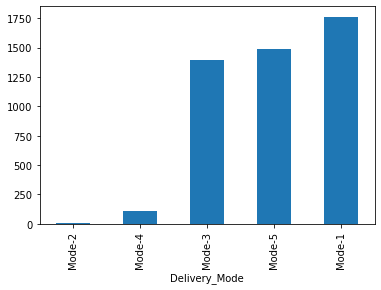

In [37]:
df.groupby('Delivery_Mode')['Status'].count().sort_values(ascending=True).plot.bar() 

#### Mode 1, Mode 5 and Mode 3 are the top most Delivery mode used

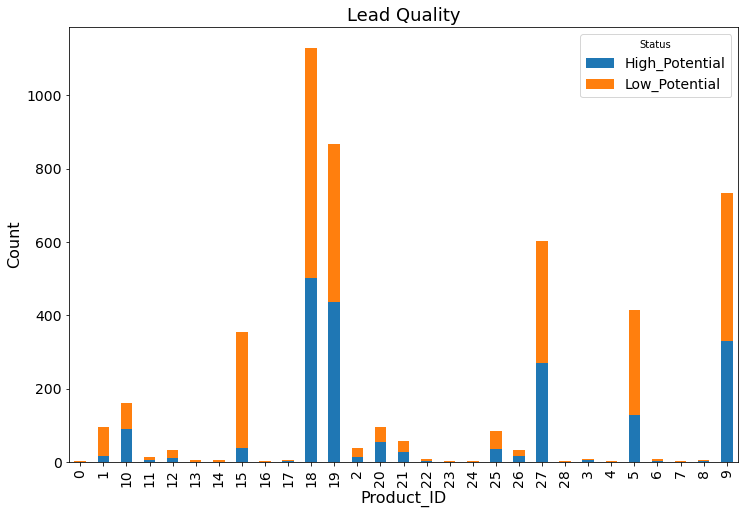

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.Product_ID, df.Status).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Product_ID", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Lead Quality", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Status", fontsize=14)
plt.show()

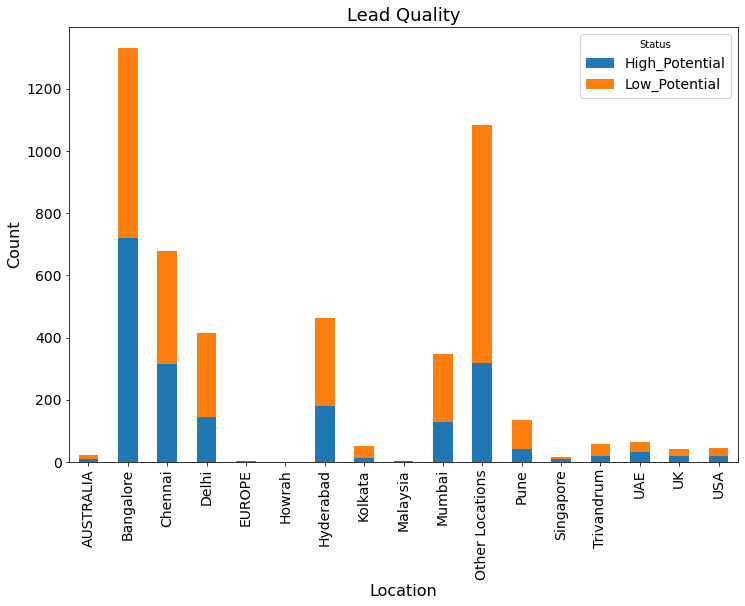

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.Location, df.Status).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Location", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Lead Quality", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Status", fontsize=14)
plt.show()

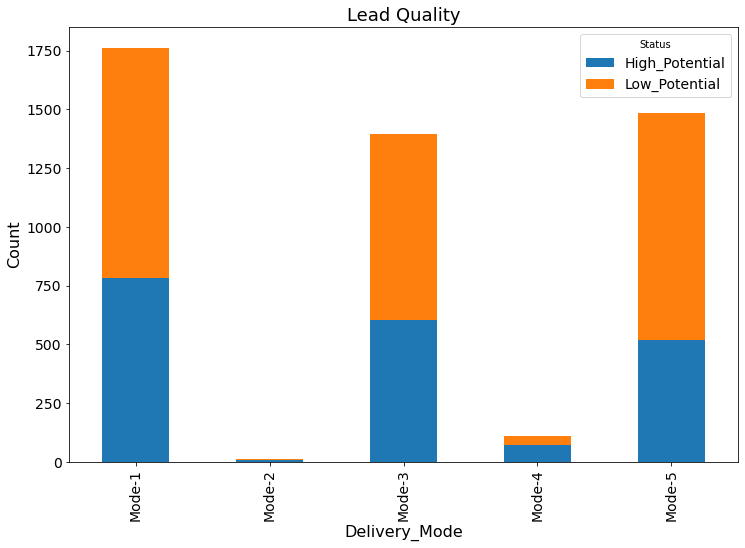

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.Delivery_Mode, df.Status).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Delivery_Mode", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Lead Quality", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Status", fontsize=14)
plt.show()

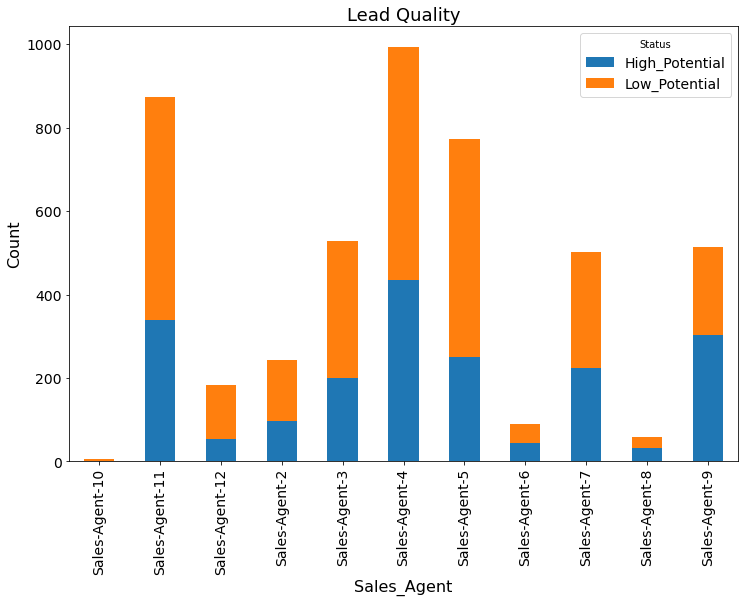

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.Sales_Agent, df.Status).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Sales_Agent", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Lead Quality", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Status", fontsize=14)
plt.show()

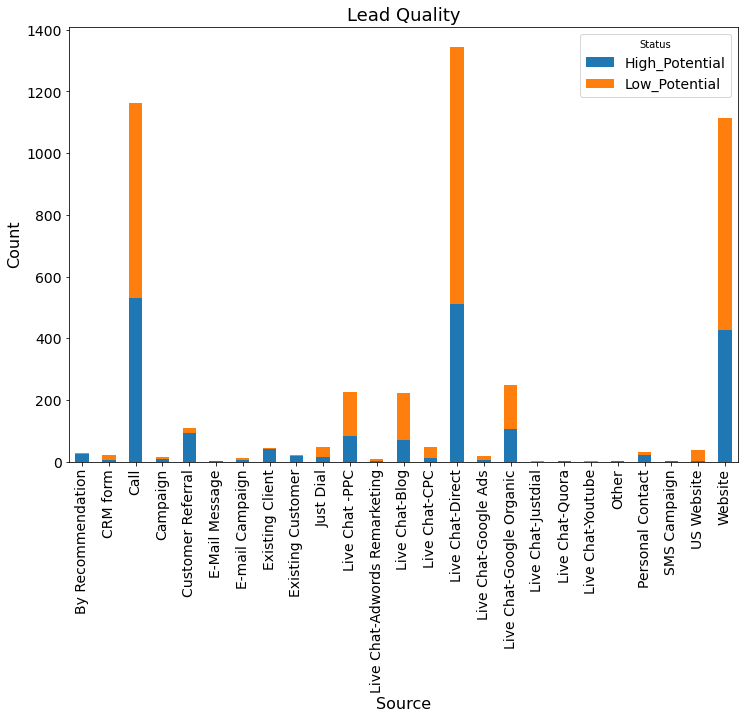

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
pd.crosstab(df.Source, df.Status).plot.bar(stacked=True, ax=ax)
ax.set_xlabel("Source", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Lead Quality", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Status", fontsize=14)
plt.show()

In [43]:
# Giving labelfor catogorical columns
label_encoder = preprocessing.LabelEncoder()
df['Source']= label_encoder.fit_transform(df['Source'])
df['Sales_Agent']= label_encoder.fit_transform(df['Sales_Agent'])
df['Location']= label_encoder.fit_transform(df['Location'])
df['Delivery_Mode']= label_encoder.fit_transform(df['Delivery_Mode'])
df['Status']= label_encoder.fit_transform(df['Status'])

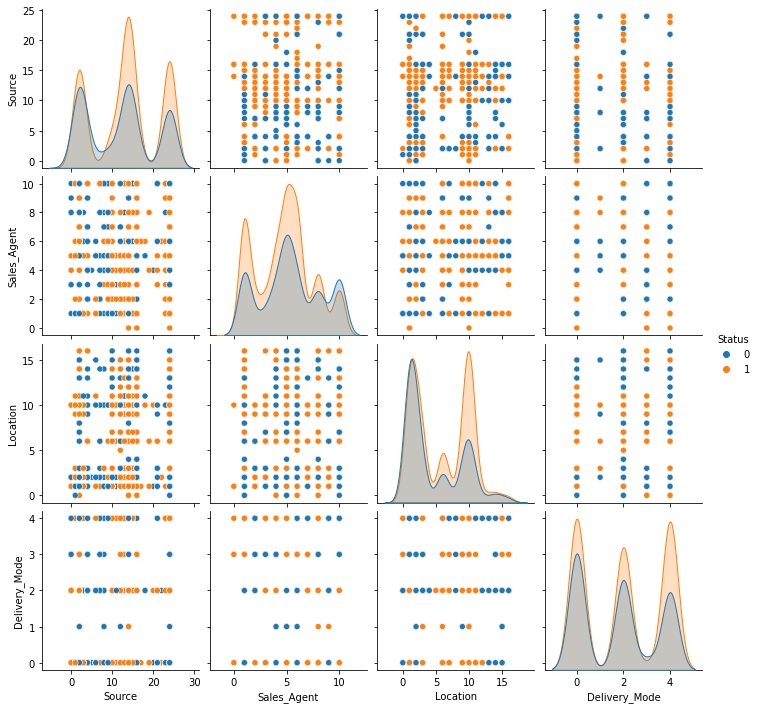

In [44]:
sns.pairplot(df,hue="Status")

<AxesSubplot:>

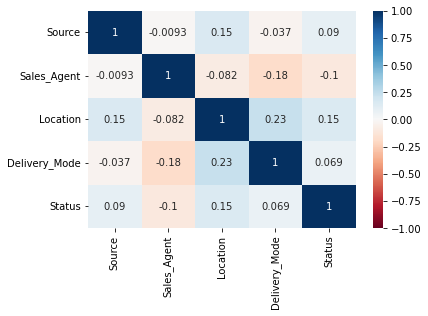

In [45]:
corr = df.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

#### No Values are correlated neither in positive and negative way

In [46]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,9,16,4,1,0,0
19,19,2,5,10,4,0
24,18,24,1,13,0,0
25,15,24,8,6,0,1
26,18,2,8,1,0,0


In [47]:
X = df.iloc[:,:-1]
y = df.Status

# Models

## Logistic Regression

In [48]:
# Fine tuning the parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
reg_model = LogisticRegression()
parameters = {'solver':['liblinear', 'lbfgs', 'sag'],
             'C':[0,5,10]}

grid_model = GridSearchCV(reg_model, parameters, cv=5, scoring='accuracy', error_score=0)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
             param_grid={'C': [0, 5, 10],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [49]:
grid_model.best_params_

{'C': 5, 'solver': 'liblinear'}

In [50]:
# Logistic Regression modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=22, random_state=15)
reg_model = LogisticRegression(solver='liblinear' ,C=5)
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.7727272727272727
[[ 7  3]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.77      0.83      0.80        12

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.77        22
weighted avg       0.77      0.77      0.77        22



## Random Forest Classifier

In [52]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
rfc_model = RandomForestClassifier(n_estimators=50)
parameters = {"max_depth": [3, None],
              "max_features": [1,6,9,12],
              "criterion": ["gini","log_loss"]}

rscv_model = RandomizedSearchCV (rfc_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'criterion': ['gini', 'log_loss'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 6, 9, 12]})

In [53]:
rscv_model.best_params_

{'max_features': 1, 'max_depth': 3, 'criterion': 'gini'}

In [54]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=14, random_state=40)

# Modle Training and evaluation
rfc_model = RandomForestClassifier(max_features=1,max_depth= 3,criterion='gini')
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.7142857142857143
[[3 4]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.64      1.00      0.78         7

    accuracy                           0.71        14
   macro avg       0.82      0.71      0.69        14
weighted avg       0.82      0.71      0.69        14



## Decision Tree

In [55]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
dtc_model = DecisionTreeClassifier()
parameters = {'max_depth':[10,None],
             'criterion': ['gini','entropy']}

rscv_model = RandomizedSearchCV (dtc_model, param_distributions=parameters,cv=5)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, None]})

In [56]:
rscv_model.best_params_

{'max_depth': 10, 'criterion': 'entropy'}

In [57]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=12)

# Modle Training and evaluation
dtc_model = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8
[[1 2]
 [0 7]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.78      1.00      0.88         7

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



## KNN

In [58]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)
knn_model = KNeighborsClassifier()
parameters = {"n_neighbors": [3, 5, 7],
              "weights": ['uniform', 'distance'],
              "algorithm": ['auto','ball_tree','kd_tree','brute']}
rscv_model = RandomizedSearchCV (knn_model, param_distributions=parameters,cv=3)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7],
                                        'weights': ['uniform', 'distance']})

In [59]:
rscv_model.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'algorithm': 'auto'}

In [60]:
# Spliiting Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=10)

# Modle Training and evaluation
knn_model = KNeighborsClassifier(n_neighbors=7,algorithm = 'auto', weights = 'uniform')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.7
[[2 2]
 [1 5]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



# Naive Bayes

## Gaussian Naive Bayes

In [61]:
# Gaussian Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, random_state=12)
gnb_model_Multi = GaussianNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8333333333333334
[[1 2]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.82      1.00      0.90         9

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



## Multinomial Naive Bayes

In [62]:
# Multinomial Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=12, random_state=12)
gnb_model_Multi = MultinomialNB()
gnb_model_Multi.fit(X_train, y_train)
y_pred = gnb_model_Multi.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.8333333333333334
[[1 2]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.82      1.00      0.90         9

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12



## Bernoulli Naive Bayes

In [63]:
# Bernoulli Naive Bayes modeling and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=15)
gnb_model_berno = BernoulliNB()
gnb_model_berno.fit(X_train, y_train)
y_pred = gnb_model_berno.predict(X_test)
print('accuracy score: ',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score:  0.7
[[0 3]
 [0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10



## Artificial Neural Network - Multi-layer Perceptron classifier

In [64]:
# Training the model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=12)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=12)

In [65]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [66]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.6
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.71      0.71      0.71         7

    accuracy                           0.60        10
   macro avg       0.52      0.52      0.52        10
weighted avg       0.60      0.60      0.60        10



In [67]:
print(confusion_matrix(y_test,y_predict_mlp))

[[1 2]
 [2 5]]


# Final Report
## Introduction
    FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. Their business is majorly dependent on the sales force effectiveness. Effective sales is dependent on lead quality.
    
## Objective

     To develop Machine Learning models to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.
     
## Project goal

1) Data exploration insights – Sales effectiveness.

2) ML model to predict the Lead Category (High Potential , Low Potential)

## Steps Followed

1) Define the problem

2) Connect to a remote Database

3) Preprocess the data

4) Feature engineering

5) Choose a machine learning algorithm

6) Training, Tuning and evaluating the model

## Dataset

1) To obtain the dataset we connected to a remote database server using sqlalchemy 
    Database Name: project_sales
    Table Name: data
    Host ID: 18.136.157.135
    Port: 3306
    Username: dm_team2
    Password: XXXXXX

2) The dataset contains the details like Created, Product_ID, Source, Mobile, EMAIL, Sales_Agent, Location, Delivery_Mode, Status of the Sales.
    
## Data Preparation

1) The Created, Email, Mobile columns are not relevent for the Data Analysis hence we droped these columns.

2) Removed null values

3) Removed all duplicate values


## Exploratory Data Analysis

1) 58.5% of the leads are having Low Potential

2) Product ID 18, 19, 9, 27, 5, 15 are the most sold products

3) Live Chat-Direct, Call, Website are the mostly used source

4) Sales Agent 4, 11 and 5 are the top 3 most agents involed with more sales activites

5) Banglore is the top Location that involved in more sales activities followed by Chennai

6) Mode 1, Mode 5 and Mode 3 are the top most Delivery mode used

## Model Training and Evaluation

We have tried with different models such as:

    1) Linear Regression (Accuracy – 77%)
    
    2) Random Forest Regression (Accuracy - 71%)
    
    3) Decision Tree Classifier (Accuracy - 80%)
    
    4) KNN (Accuracy - 70%)
    
    5) GaussianNB (Accuracy - 83%)
    
    6) BernoulliNB (Accuracy - 70%)
    
    7) MultinomialNB (Accuracy - 83%)

    8) Artificial Neural Network [Multi-layer Perceptron classifier] - (Accuracy - 60%)
    
## Gaussian and Multinomial Navie Bayes gives the highest accuracy of 83%

##### Performed Feature selection and Hyperparamater tuning for Linear Regression, Random Forest Regression ,Decision Tree Classifier, KNN which increased the model's accuracy.


## Limitations

1) The Data was small

2) The dataset had lot of duplicate values

## Conclusion

1) Built 8 Machine Learing models which predicts whether the lead is High or Low Potential which helps us to increase the sales

## Business Analysis

    Analyzing high-quality leads is crucial for businesses to optimize their sales and marketing efforts effectively. By identifying and understanding the characteristics and behaviors of leads that are more likely to convert into customers, organizations can focus their resources and strategies on generating and nurturing these high-quality leads.

1) Data Collection and Segmentation: Collect relevant data on leads to facilitate analysis and segmentation. This data can be gathered from various sources, including website analytics, CRM systems, marketing automation platforms, and customer surveys. Key data points to consider include: Demographic data: Age, gender, location, industry, job title, company size, etc.

2) Behavioral data: Website visits, content downloads, email opens and clicks, social media interactions, webinar attendance, etc.

3) Conversion data: Lead source, lead nurturing activities, conversion date, deal size, sales cycle length, etc.

4) Conversion Analysis: Analyze the conversion rates and outcomes of leads based on their quality scores. Compare the conversion rates and revenue generated by high-quality leads versus lower-quality leads. Identify trends and patterns in the behavior and characteristics of high-quality leads that contribute to their higher conversion rates.

5) Source and Channel Analysis: Evaluate the sources and channels through which high-quality leads are acquired. Identify the marketing campaigns, channels, and tactics that consistently generate a higher proportion of high-quality leads. This analysis helps in optimizing marketing investments and focusing on the most effective lead generation strategies.

6) Customer Personal Analysis: Analyze the characteristics and behaviors of high-quality leads to develop customer personas. Customer personas are fictional representations of your ideal customers, created based on data and insights. They help align marketing and sales strategies by providing a deep understanding of the target audience's needs, pain points, motivations, and preferences.

7) Feedback and Continuous Improvement: Gather feedback from the sales team on the quality of leads generated. Solicit their insights on the characteristics and behaviors of leads that have resulted in successful conversions.